## We are using random forest to do the binary classification task.

In [1]:
from pre import complete_data,plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
scaler = StandardScaler()
parameter = {"n_estimators":(10,50,100),"max_depth":(20,50)}
cv = KFold(10)
clf = GridSearchCV(forest,parameter,cv = cv)

In [3]:
forest = clf.fit( scaler.fit_transform(complete_data.loc["train"].drop(complete_data.loc["train"].select_dtypes(include="object").dtypes.index, axis=1)), complete_data.loc["train"]["class"] )

In [4]:
p = clf.predict(scaler.transform(complete_data.loc["test"].drop(complete_data.loc["test"].select_dtypes(include="object").dtypes.index, axis=1)))

In [5]:
p_proba = clf.predict_proba(scaler.transform(complete_data.loc["test"].drop(complete_data.loc["test"].select_dtypes(include="object").dtypes.index, axis=1)))

In [6]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# The accuracy is: 

In [7]:
# The accuracy of random forest model
# The "class" in train and test is a little bit different. "train":"<=50K" while "test":"<=50K."
from sklearn.metrics import accuracy_score
print(accuracy_score(p+".",complete_data.loc["test"]["class"]))

0.8643817947300534


# Confusion matrix:

In [8]:
# Count the freq of each class in test dataset
from collections import Counter
cnt = Counter(complete_data.loc["test"]["class"])
print(cnt)

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(complete_data.loc["test"]["class"],p+"."))

Counter({' <=50K.': 12435, ' >50K.': 3846})
[[11818   617]
 [ 1591  2255]]


|Confusion matrix| Predicted True| Predicted False|
|---------|-------|------|
|Condition True|11818    |617|
|Condition False|1591   | 2255|

(True:<=50K,False:>50K)

Normalized confusion matrix
[[0.95038199 0.04961801]
 [0.41367655 0.58632345]]


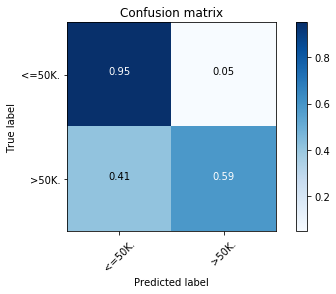

In [9]:
plot_confusion_matrix(confusion_matrix(complete_data.loc["test"]["class"],p+"."),
                     classes = np.array(["<=50K.",">50K."]),normalize=True)

# AUC ROC

In [10]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(complete_data.loc["test"]["class"]==" <=50K.",p_proba[:,0],average="weighted")) # "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

0.9150666670012197


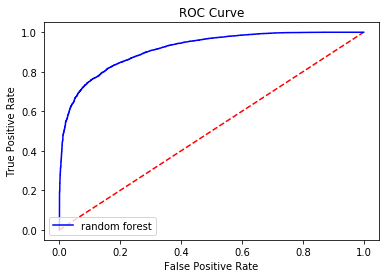

In [11]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.plot([0,1],[0,1],'r--')

from sklearn.metrics import roc_curve
tpr,fpr,_ = roc_curve(complete_data.loc["test"]["class"],p_proba[:,0],pos_label = " <=50K.")
ax.plot(tpr,fpr,c='b',label="random forest")
ax.legend(loc="lower left")
plt.show()

# PR curve

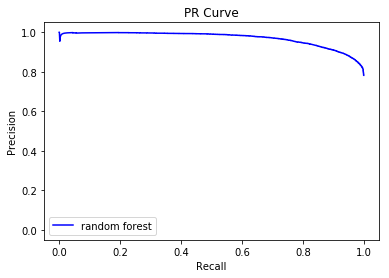

In [12]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('PR Curve')

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
p,r,_ = precision_recall_curve(complete_data.loc["test"]["class"],p_proba[:,0],pos_label = " <=50K.")
ax.plot(r,p,c='b',label="random forest")
ax.legend(loc="lower left")
plt.show()